In [3]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import VarianceThreshold
from collections import defaultdict
from matplotlib import rc

In [4]:
data = pd.read_csv(r'H:\My Drive\NHTS\Data\Generated Data\cleaneddataset.csv')

In [5]:
data.shape

(199489, 87)

In [6]:
data.dtypes.values

array([dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
      

In [7]:
data.columns

Index(['Unnamed: 0', 'ALT_16', 'ALT_23', 'ALT_45', 'BIKE', 'BIKE_DFR',
       'BIKE_GKP', 'BIKE4EX', 'BIKESHARE', 'BORNINUS', 'BUS', 'CAR',
       'CARSHARE', 'CDIVMSAR', 'CNTTDHH', 'CNTTDTR', 'CONDNIGH', 'CONDPUB',
       'CONDRIDE', 'CONDRIVE', 'CONDSPEC', 'CONDTAX', 'CONDTRAV', 'DELIVER',
       'DRVRCNT', 'EDUC', 'GT1JBLWK', 'HBHTNRNT', 'HBPPOPDN', 'HEALTH',
       'HH_HISP', 'HH_RACE', 'HHFAMINC', 'HHSIZE', 'HHSTATE', 'HHVEHCNT',
       'HOMEOWN', 'HTEEMPDN', 'LIF_CYC', 'LPACT', 'MCUSED', 'MEDCOND',
       'MSACAT', 'MSASIZE', 'NBIKETRP', 'NUMADLT', 'NWALKTRP', 'OCCAT', 'PC',
       'PHYACT', 'PLACE', 'PRICE', 'PRMACT', 'PTRANS', 'PTUSED', 'R_AGE',
       'R_HISP', 'R_RACE', 'R_SEX', 'RESP_CNT', 'SPHONE', 'TAXI', 'TIMETOWK',
       'TRAIN', 'URBRUR', 'VPACT', 'W_CANE', 'W_CHAIR', 'W_CRUTCH', 'W_DOG',
       'W_MTRCHR', 'W_NONE', 'W_SCOOTR', 'W_WHCANE', 'W_WLKR', 'WALK',
       'WALK_DEF', 'WALK_GKQ', 'WALK2SAVE', 'WALK4EX', 'WEBUSE17', 'WKFTPT',
       'WORKER', 'WRK_HOME', 'WRKCO

In [8]:
data.drop('Unnamed: 0', axis = 1, inplace = True)

In [9]:
X = data.drop('HEALTH', axis = 1)
y = data['HEALTH']

In [10]:
y.unique()

array([2, 3, 1, 4, 5], dtype=int64)

In [11]:
y.value_counts()

2    74195
1    56048
3    49236
4    15821
5     4189
Name: HEALTH, dtype: int64

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,stratify = y, random_state = 24)

In [13]:
y_train.value_counts()/y_train.shape[0]

2    0.371925
1    0.280959
3    0.246812
4    0.079303
5    0.021000
Name: HEALTH, dtype: float64

In [14]:
y_test.value_counts()/y_test.shape[0]

2    0.371925
1    0.280954
3    0.246807
4    0.079321
5    0.020993
Name: HEALTH, dtype: float64

With balanced sample

In [15]:
rf_bal = RandomForestClassifier(n_estimators = 100, n_jobs=-1, random_state = 24, oob_score=True, class_weight='balanced_subsample')
rf_bal.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=-1, oob_score=True, random_state=24,
            verbose=0, warm_start=False)

In [16]:
rf_bal.score(X_test, y_test)

0.49431556152627676

In [20]:
names = X_train.columns
scores = defaultdict(list)
acc = np.mean(y_test == rf_bal.predict(X_test))
for i in range(X_test.shape[1]):
    X_t = X_test.copy()
    np.random.shuffle(X_t.iloc[:, i].values)
    shuff_acc = np.mean(y_test == rf_bal.predict(X_t))
    scores[names[i]].append((acc-shuff_acc)/acc)
print ("Features sorted by their score:")
feat_imp_bal = sorted([(round(np.mean(score), 4), feat) for
            feat, score in scores.items()], reverse=True)
print (feat_imp_bal)

Features sorted by their score:
[(0.0481, 'VPACT'), (0.0443, 'R_AGE'), (0.0266, 'MEDCOND'), (0.0256, 'PHYACT'), (0.021, 'HHFAMINC'), (0.0183, 'LPACT'), (0.0152, 'AVGHHINC'), (0.0123, 'EDUC'), (0.011, 'PRMACT'), (0.0088, 'PLACE'), (0.0082, 'PRICE'), (0.0077, 'HTEEMPDN'), (0.0067, 'CDIVMSAR'), (0.0065, 'LIF_CYC'), (0.0064, 'BIKE'), (0.0062, 'WALK4EX'), (0.0061, 'WORKER'), (0.006, 'RESP_CNT'), (0.006, 'HHSIZE'), (0.0059, 'WALK'), (0.0057, 'NWALKTRP'), (0.0052, 'CNTTDHH'), (0.0049, 'WRKCOUNT'), (0.0046, 'CONDTRAV'), (0.0042, 'NUMADLT'), (0.004, 'HHSTATE'), (0.0039, 'WALK2SAVE'), (0.0038, 'WKFTPT'), (0.0037, 'DELIVER'), (0.0037, 'ALT_45'), (0.0036, 'MSACAT'), (0.0036, 'HBHTNRNT'), (0.0035, 'GT1JBLWK'), (0.0034, 'HBPPOPDN'), (0.0034, 'ALT_16'), (0.0033, 'CNTTDTR'), (0.0031, 'TAXI'), (0.003, 'MSASIZE'), (0.003, 'HHVEHCNT'), (0.003, 'ALT_23'), (0.0029, 'SPHONE'), (0.0029, 'BUS'), (0.0027, 'PTRANS'), (0.0026, 'PC'), (0.0025, 'OCCAT'), (0.0024, 'CAR'), (0.0022, 'R_RACE'), (0.0022, 'HOMEOWN'), (0

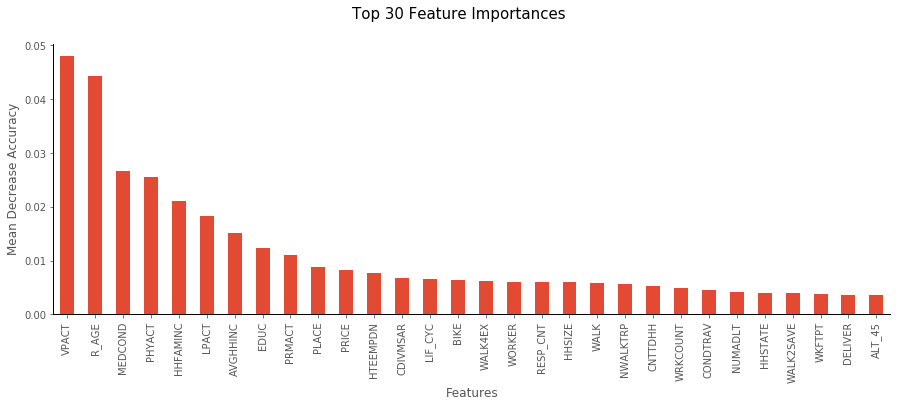

In [22]:
plt.style.use('ggplot')
rc('figure', figsize=(15,5))
fig, ax = plt.subplots()
pd.DataFrame(feat_imp_bal, columns = ['Importance', 'Features']).set_index('Features')[0:30].plot(kind = 'bar', ax = ax)
ax.grid(False)
ax.set_facecolor((1, 1, 1))
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
fig.suptitle('Top 30 Feature Importances', fontsize=15)
plt.ylabel("Mean Decrease Accuracy")
ax.legend_.remove()
fig.savefig('NHTSFeatureImp.pdf', bbox_inches = 'tight')

In [102]:
conf_matrix = confusion_matrix(y_test, rf_bal.predict(X_test), labels = [1,2,3,4,5])
conf_matrix

array([[ 7173,  5967,   817,    54,     1],
       [ 3652, 12002,  2714,   175,     6],
       [  808,  6612,  4182,   663,    44],
       [   60,   981,  1743,  1021,   151],
       [    9,    41,   296,   522,   179]], dtype=int64)

Text(0.5,1,'normalized confusion matrix')

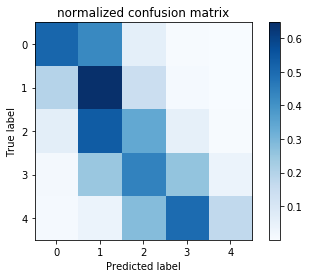

In [101]:
conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
plt.imshow(conf_matrix, interpolation='nearest', cmap = plt.cm.Blues)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.colorbar()
plt.title('normalized confusion matrix')